# Electronics Store Sales Analysis 

## Importing the necessary libraries (Panda)

In [66]:
import pandas as pd
import os

## Combining all 12 months of Sales Data into one .csv file 

In [68]:
#Concatenating the 12 different csv files

df=pd.read_csv("Sales-File/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales-File')]

yearly_data = pd.DataFrame()

for file in files:
    df=pd.read_csv("Sales-File/"+file)
    yearly_data = pd.concat([yearly_data, df])

yearly_data.to_csv("all_data.csv", index=False)

## Load the Updated DataFrame 

In [70]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning

### Droping NaN values

In [72]:
nan_mask = all_data.isna()

all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Dropping 'Or' Values From 'Order Date' column

In [74]:
all_data=all_data[all_data['Order Date'].str[0:2]!= 'Or']

### Converting Necessary Column Types

In [76]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

## Add Necessary Columns to DataFrame (Month, Sales)

In [78]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [80]:
all_data['Total']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Question 1: Which 3 months had the highest sales, and what was the total amount in each month?

In [82]:
# Group by 'Month' and calculate total sales for each month
monthly_sales = all_data.groupby('Month')['Total'].sum().reset_index()

monthly_sales_sorted = monthly_sales.sort_values(by='Total', ascending=False)

top_3_months = monthly_sales_sorted.head(3)

top_3_months

,Month,Total
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24


<function matplotlib.pyplot.show(close=None, block=None)>

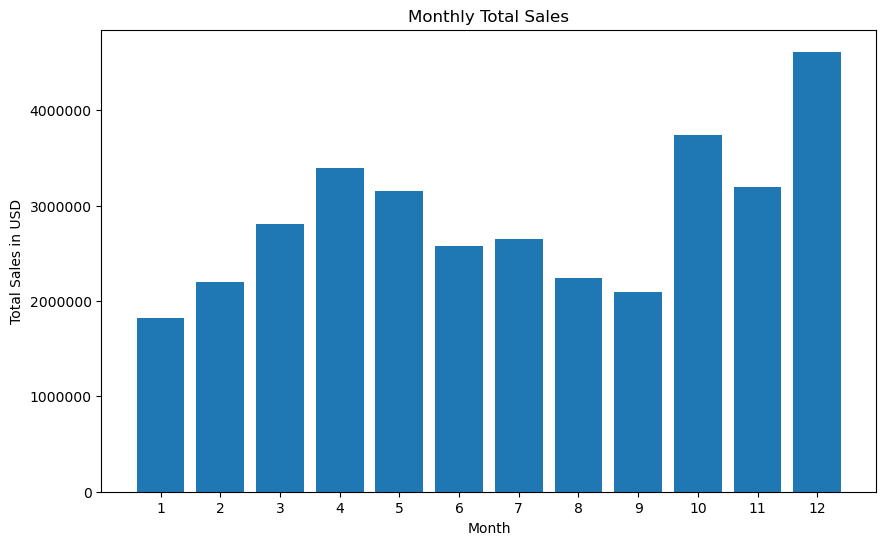

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_sorted['Month'], monthly_sales_sorted['Total'])
plt.xticks(monthly_sales_sorted['Month'])
plt.ylabel("Total Sales in USD")
plt.xlabel("Month")
plt.title("Monthly Total Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.show

## Question 2: Which city had the highest sales?

In [103]:
#Splitting the address column
address_parts = all_data['Purchase Address'].str.split(',', expand=True)

city_column = address_parts[1]

all_data['City'] = city_column
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [90]:
# Group by 'City' and calculate total sales for each month
city_sales = all_data.groupby('City')['Total'].sum().reset_index()

city_sales_sorted = city_sales.sort_values(by='Total', ascending=False)

top_10_cities = city_sales_sorted.head(10)
top_10_cities

,City,Total
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


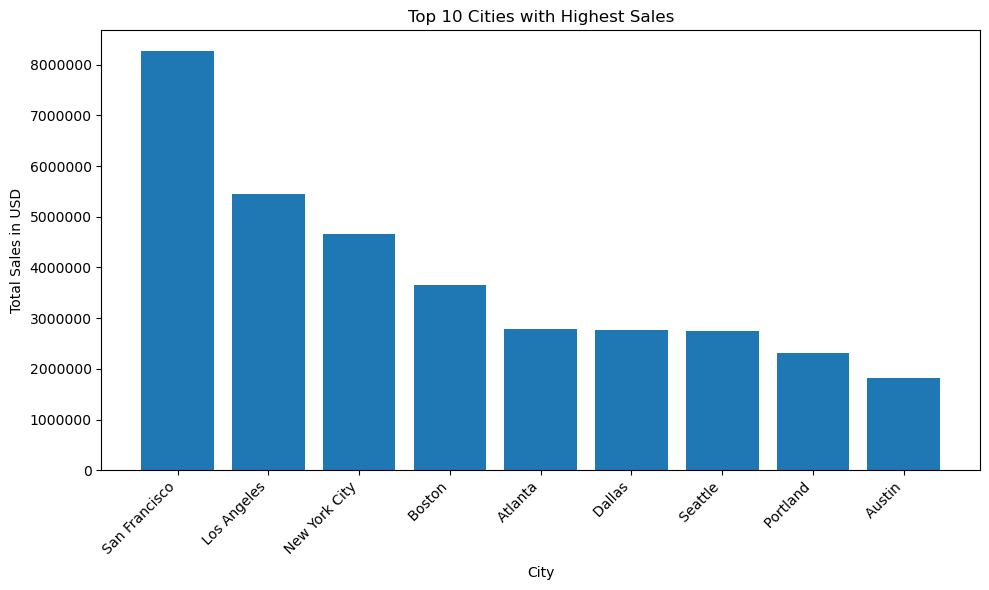

In [98]:
plt.figure(figsize=(10, 6))  
plt.bar(top_10_cities['City'], top_10_cities['Total'])

plt.xlabel('City')
plt.ylabel('Total Sales in USD')
plt.title('Top 10 Cities with Highest Sales')

plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout() 
plt.show()

## Question 3: What hour of the day is the best to show advertisements?

In [109]:
#Extracting the Hour from the Order Date column
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

all_data['Hour']=all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


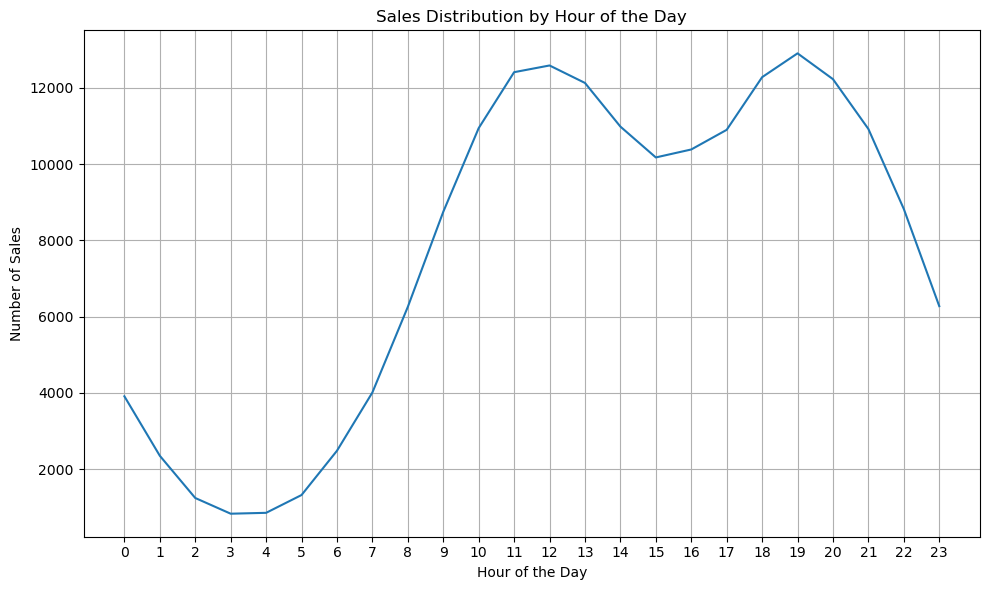

In [132]:
# Grouping all_data by Hour and Graphing
all_hours = list(range(24))

hourly_sales = all_data.groupby('Hour').size()

plt.figure(figsize=(10, 6)) 
plt.plot(hourly_sales.index, hourly_sales.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.title('Sales Distribution by Hour of the Day')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(all_hours) 
plt.tight_layout() 
plt.grid()
plt.show()

There are 2 strategies a company can take here to schedule their advertisements
1. Schedule advertisements to increase total sales in the hours of the day that already command high sales (11-12 AM and 6-8PM).
2. Schedule advertisements to increase total sales in the hours of the day that are not commanding high sales, but are not the lowest either (2-5PM). 

It is important to note that the second strategy would only work for hours of the day that already have a good amount of sales, as the hours of the day with lowest sales are due to inactivity and sleep. 

## Question 4: Which Products are often sold together?

In [151]:
# Grouping by Order ID and then creating a counter for the number of pairs of items sold most
order_products = all_data[['Order ID', 'Product']]

grouped_products = order_products.groupby('Order ID')['Product'].apply(list)

from collections import Counter
product_pairs = Counter()

for products in grouped_products:
    from itertools import combinations
    pairs = combinations(products, 2)
    product_pairs.update(pairs)

top_10_pairs = product_pairs.most_common(10)
top_10_pairs

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Therefore, it would make sense for the firm to run promotions where the customer can buy these pairs of items together for a lower price - this could increase the total sales for that pair of items even higher.

## Question 5: What product sold the most and why?

The product that sold the most is: AAA Batteries (4-pack)
Total quantity sold: 31017


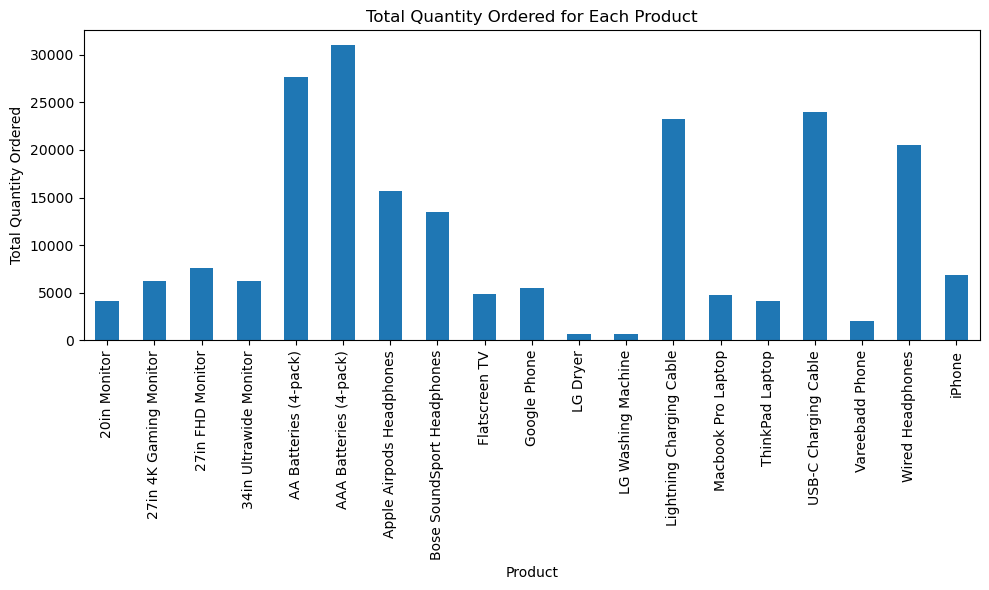

In [169]:
# Group by 'Product' and calculate total quantity ordered for each product
product_quantity = all_data.groupby('Product')['Quantity Ordered'].sum()

most_sold_product = product_quantity.idxmax()  

print("The product that sold the most is:", most_sold_product)
print("Total quantity sold:", product_quantity.max())

plt.figure(figsize=(10, 6))
product_quantity.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered for Each Product')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

/tmp/ipykernel_540/2325159299.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_stats.index, rotation=90)


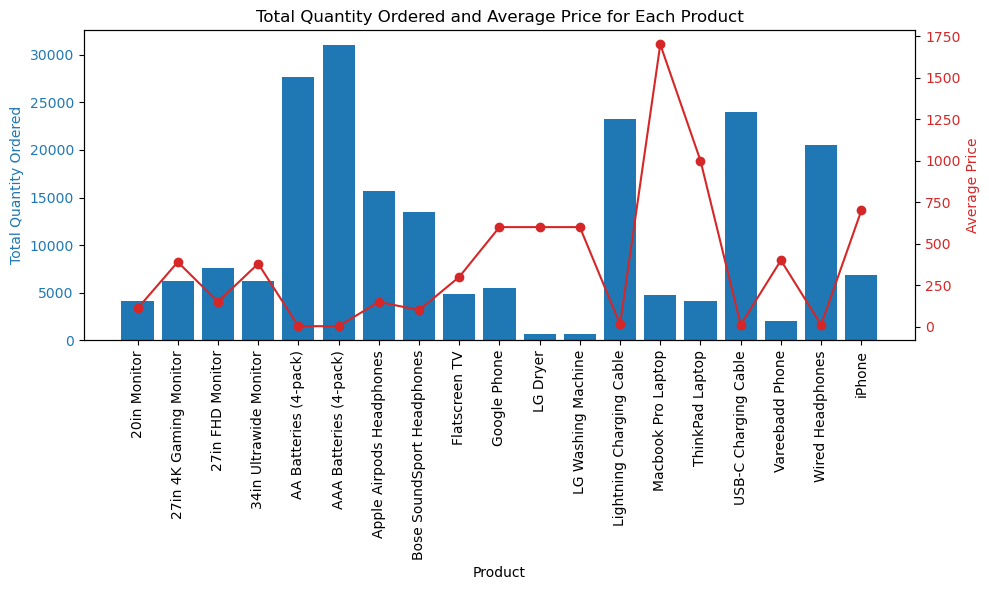

In [171]:
#Adding price as a second y variable onto the above chart using subplots
product_stats = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.bar(product_stats.index, product_stats['Quantity Ordered'], color=color)
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity Ordered', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(product_stats.index, rotation=90)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.plot(product_stats.index, product_stats['Price Each'], color=color, marker='o')
ax2.set_ylabel('Average Price', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Total Quantity Ordered and Average Price for Each Product')

plt.tight_layout()
plt.show()

This shows that even though products like AAA Batteries have the highest quantity ordered, their price is a lot lower than some of the other items with lower quantities ordered. There are some anomalies, like for example the Macbook Pro Laptop has more sales than the LG Dryer and Washing Machine, even though the Macbook has a higher price - this is probably due to the fact that every household needs only 1 washing machine or dryer, but will probably need 3 or 4 laptops. 

# Thank You!
### Aayush Damani